# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [640]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [641]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [642]:
#df_verseny_public_train

In [643]:
#df_verseny_public_train.describe()

In [644]:
#df_verseny_public_train.columns

In [645]:
len(df_verseny_public_train)

100000

# Remove missing values

In [646]:
df_verseny_public_train = df_verseny_public_train.dropna()

In [647]:
len(df_verseny_public_train)

100000

# Selecting columns with the highest variance in the training set

In [648]:
# Select 10-20-30-...-100 columns with the highest variance in the training set
df_verseny_public_train.var().sort_values(ascending=False)

#select first 100 columns with the highest variance
y = df_verseny_public_train['target']
df_verseny_public_train = df_verseny_public_train[df_verseny_public_train.var().sort_values(ascending=False).index[:100]]

# PCA

In [649]:
"""from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_scaled)

X_pca

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

plt.xlabel('First principal component')

plt.ylabel('Second principal component')

plt.show()"""

"from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\nX = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)\ny = df_verseny_public_train['target']\n\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(X)\n\npca = PCA(n_components=50)\n\nX_pca = pca.fit_transform(X_scaled)\n\nX_pca\n\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')\n\nplt.xlabel('First principal component')\n\nplt.ylabel('Second principal component')\n\nplt.show()"

# Feature importance

In [650]:
X = df_verseny_public_train.drop(['cookie_id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

Feature ranking:
1. Feature 2 (0.040136) Topic42_ec
2. Feature 0 (0.036941) Topic63_ec
3. Feature 12 (0.036203) Topic12_ec
4. Feature 41 (0.033347) Topic51_ec
5. Feature 7 (0.033043) Topic4_ec
6. Feature 19 (0.028929) Topic56_ec
7. Feature 8 (0.024541) Topic13_ec
8. Feature 42 (0.024462) Topic4_ic
9. Feature 9 (0.024455) Topic14_ec
10. Feature 27 (0.023779) Topic55_ic
11. Feature 47 (0.023310) Topic13_ic
12. Feature 22 (0.022138) Topic3_ic
13. Feature 10 (0.021189) Topic74_ec
14. Feature 28 (0.020392) Topic54_ec
15. Feature 56 (0.019589) Topic56_ic
16. Feature 58 (0.019578) Topic19_ic
17. Feature 20 (0.019245) Topic55_ec
18. Feature 62 (0.018520) Topic12_ic
19. Feature 46 (0.017497) Topic14_ic
20. Feature 26 (0.015786) Topic24_ec
21. Feature 74 (0.015090) Topic24_ic
22. Feature 45 (0.014526) Topic9_ec
23. Feature 13 (0.014343) Topic65_ec
24. Feature 14 (0.014324) Topic1_ec
25. Feature 33 (0.014028) Topic41_ec
26. Feature 34 (0.013468) Topic136_ec
27. Feature 15 (0.013343) Topic16_ec
28

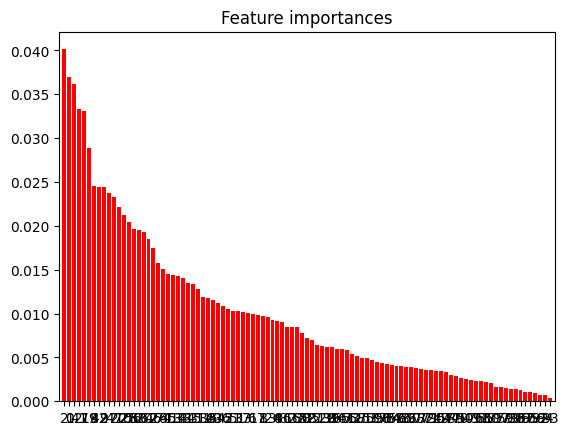

In [651]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 0 (0.030399) Topic63_ec
2. Feature 7 (0.029850) Topic4_ec
3. Feature 27 (0.028577) Topic55_ic
4. Feature 2 (0.028430) Topic42_ec
5. Feature 12 (0.027965) Topic12_ec
6. Feature 9 (0.027683) Topic14_ec
7. Feature 8 (0.027458) Topic13_ec
8. Feature 42 (0.026783) Topic4_ic
9. Feature 62 (0.026677) Topic12_ic
10. Feature 47 (0.025747) Topic13_ic
11. Feature 46 (0.025063) Topic14_ic
12. Feature 19 (0.024500) Topic56_ec
13. Feature 41 (0.024496) Topic51_ec
14. Feature 56 (0.023310) Topic56_ic
15. Feature 28 (0.022780) Topic54_ec
16. Feature 22 (0.020458) Topic3_ic
17. Feature 20 (0.019946) Topic55_ec
18. Feature 6 (0.018387) Topic19_ec
19. Feature 58 (0.017079) Topic19_ic
20. Feature 10 (0.015261) Topic74_ec
21. Feature 13 (0.015128) Topic65_ec
22. Feature 1 (0.015066) Topic52_ec
23. Feature 14 (0.014834) Topic1_ec
24. Feature 26 (0.014146) Topic24_ec
25. Feature 54 (0.013734) Topic9_ic
26. Feature 24 (0.013479) Topic3_ec
27. Feature 51 (0.013336) Topic15_ic
28. Fe

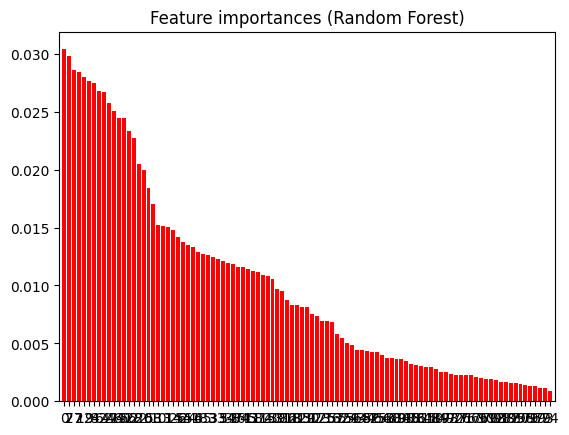

In [652]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [653]:
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0         2       0.040136       0.028430
1         0       0.036941       0.030399
2        12       0.036203       0.027965
3        41       0.033347       0.024496
4         7       0.033043       0.029850
..      ...            ...            ...
94       95       0.001090       0.001557
95       66       0.000908       0.002231
96       92       0.000723       0.001801
97       94       0.000719       0.000879
98       93       0.000365       0.001124

[99 rows x 3 columns]


In [654]:
percentile_threshold = 0.5

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 50 percentileDT: 0.007185629188621481 percentileRF: 0.008103335083112865


In [655]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0         2       0.040136       0.028430
1         0       0.036941       0.030399
2        12       0.036203       0.027965
3        41       0.033347       0.024496
4         7       0.033043       0.029850
5        19       0.028929       0.024500
6         8       0.024541       0.027458
7        42       0.024462       0.026783
8         9       0.024455       0.027683
9        27       0.023779       0.028577
10       47       0.023310       0.025747
11       22       0.022138       0.020458
12       10       0.021189       0.015261
13       28       0.020392       0.022780
14       56       0.019589       0.023310
15       58       0.019578       0.017079
16       20       0.019245       0.019946
17       62       0.018520       0.026677
18       46       0.017497       0.025063
19       26       0.015786       0.014146
20       74       0.015090       0.011568
21       45       0.014526       0.011438
22    

## Dropping the feature which are not in the percentile

In [656]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [657]:
column_names = list(X.columns)

In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA train test dataset

In [659]:
#X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

## Using 80 percentil dataset

In [660]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

base_rf = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=150,
    max_depth=12,
    random_state=42,
    criterion='entropy',
    max_features='log2',
    oob_score=True,
    verbose=1
)

base_ada = AdaBoostClassifier(
    n_estimators=150,
    random_state=42,
    learning_rate=1.5
)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', base_rf),
        ('ada', base_ada),
    ],
    voting='soft',
    verbose=True
)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.1s finished


[Voting] ....................... (1 of 2) Processing rf, total=   4.5s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[Voting] ...................... (2 of 2) Processing ada, total=  10.6s


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.1s finished


Accuracy (Voting Classifier): 0.98525


## Using PCA

In [661]:
"""from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion='entropy', max_features='log2', oob_score=True, verbose=1)
base_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)

voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft', verbose=True)

voting_clf.fit(X_train_pca, y_train_pca)

y_pred_voting = voting_clf.predict(X_test_pca)

accuracy_voting = accuracy_score(y_test_pca, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)"""

'from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier\nfrom sklearn.metrics import accuracy_score\n\nbase_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion=\'entropy\', max_features=\'log2\', oob_score=True, verbose=1)\nbase_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)\n\nvoting_clf = VotingClassifier(estimators=[(\'rf\', base_rf), (\'ada\', base_ada)], voting=\'soft\', verbose=True)\n\nvoting_clf.fit(X_train_pca, y_train_pca)\n\ny_pred_voting = voting_clf.predict(X_test_pca)\n\naccuracy_voting = accuracy_score(y_test_pca, y_pred_voting)\nprint("Accuracy (Voting Classifier):", accuracy_voting)'

# Loading test set

In [662]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Evaluation

## Using 80 percentil

In [663]:
X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)
X_test_test = X_test_test[column_names]

In [664]:
y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_80_entropy.csv', index=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.6s finished


## Using PCA

In [665]:
"""from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_test_test)

pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_scaled)

y_pred_rf = voting_clf.predict_proba(X_pca)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_PCA.csv', index=False)"""

"from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\nX_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)\n\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(X_test_test)\n\npca = PCA(n_components=50)\n\nX_pca = pca.fit_transform(X_scaled)\n\ny_pred_rf = voting_clf.predict_proba(X_pca)[:, 1]\n\ndf_verseny_public_test['target'] = y_pred_rf\n\ndf_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]\n\ndf_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_PCA.csv', index=False)"